<a href="https://colab.research.google.com/github/mirianosoriov/ChallegeG8-Analisis_de_Ventas-Tiendas_Alura_Store/blob/main/Proyecto1_AluraStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 **Análisis Comparativo de Tiendas de Alura Store: Recomendación de Venta**

📌 Elaborado por: Mirian Lucero Osorio Valencia - 📅 Mayo 2025

<div align="center">
  <img src="https://avatars.githubusercontent.com/u/108864439?v=4" width="80">
</div>

Este proyecto fue desarrollado como parte de la especialización en Ciencia de Datos del programa Oracle Next Education – G8 👩🏻‍💻.

---



# **1.-🔎 Introducción**

El Sr. Juan, dueño de la cadena Alura Store, está evaluando la posibilidad de vender una de sus cuatro tiendas para emprender un nuevo proyecto. Para tomar esta decisión de forma informada y estratégica, se realizó un análisis integral de rendimiento que incluye la facturación total, comportamiento de ventas por categoría, satisfacción de clientes, desempeño de productos y costos logísticos. Este informe sintetiza los hallazgos más relevantes y ofrece una recomendación justificada sobre qué tienda debería venderse.

<div align="center">
  <img src="https://raw.githubusercontent.com/mirianosoriov/ChallegeG8-Analisis_de_Ventas-Tiendas_Alura_Store/main/Challenge1.png" width="600">
</div>



# **2.-📈 Desarrollo del Análisis.**

In [115]:
# Importamos las librerías que usaremos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
from matplotlib import ticker
from IPython.display import HTML, display

In [116]:
#Importamos la data de las 4 tiendas
# Lectura de datos directamente en un diccionario
urls = {
    'Tienda 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    'Tienda 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    'Tienda 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    'Tienda 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# **2.1.-💰 Análisis de facturación.**

In [117]:
# Facturación total por tienda
df_fact = pd.DataFrame(
    [(k, pd.read_csv(v)['Precio'].sum()) for k, v in urls.items()],
    columns=['Tienda', 'Facturación Total']
).sort_values('Facturación Total', ascending=False)
display(HTML(
    """<style>.tabla-facturacion {border-collapse: collapse; width: 60%; margin: 20px auto; font-family: Arial; box-shadow: 0 0 5px rgba(0,0,0,0.1)}
    .tabla-facturacion th {background: #2c3e50; color: white; padding: 10px; text-align: center}
    .tabla-facturacion td {padding: 8px; border-bottom: 1px solid #ddd; text-align: left}
    .destacado {color: #FFA500; font-weight: bold}.moneda {text-align: right; font-family: 'Courier New'}</style>"""
    + "<div style='text-align:center;margin-bottom:20px'><h2 style='color:#2c3e50'>Facturación por Tienda</h2></div>"
    + "<table class='tabla-facturacion'><tr><th>Posición</th><th>Tienda</th><th>Facturación Total</th></tr>"
    + "".join(
        f"<tr><td>{i}</td><td class='{'destacado' if i==1 else ''}'>{r['Tienda']}</td><td class='moneda {'destacado' if i==1 else ''}'>${r['Facturación Total']:,.0f}</td></tr>"
        for i, (_, r) in enumerate(df_fact.iterrows(), 1)
    )
    + "</table>"
))
print(f"\nLa tienda que más vendió fue {df_fact.iloc[0]['Tienda']} con una facturación de ${df_fact.iloc[0]['Facturación Total']:,.0f}")
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

Posición,Tienda,Facturación Total
1,Tienda 1,"$1,150,880,400"
2,Tienda 2,"$1,116,343,500"
3,Tienda 3,"$1,098,019,600"
4,Tienda 4,"$1,038,375,700"



La tienda que más vendió fue Tienda 1 con una facturación de $1,150,880,400


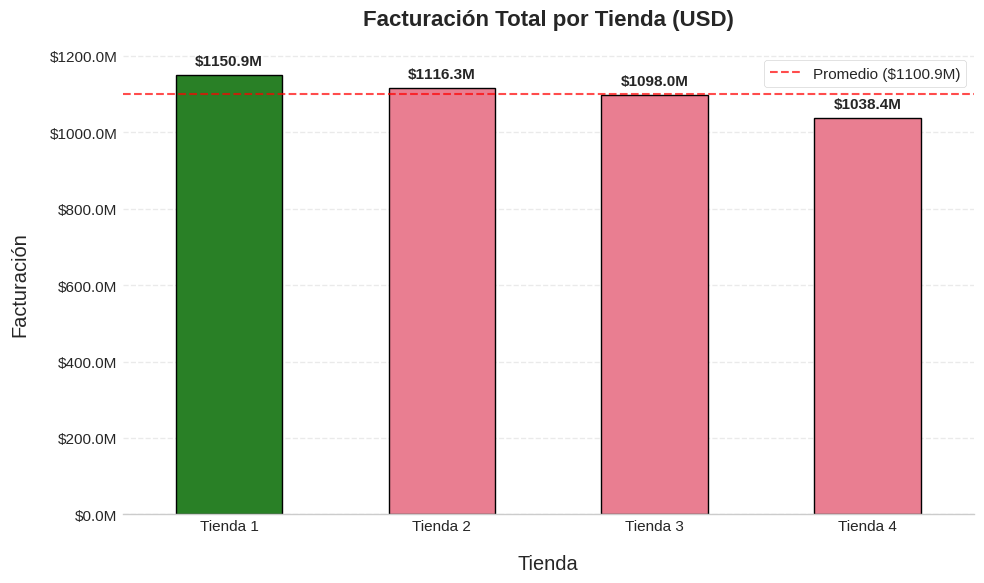

In [118]:
fig, ax = plt.subplots()
sns.barplot(
    x='Tienda',
    y='Facturación Total',
    data=df_fact,
    order=df_fact['Tienda'],
    width=0.5,
    saturation=0.8,
    edgecolor='black',
    linewidth=1,
    ax=ax
)
plt.title('Facturación Total por Tienda (USD)', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Tienda', labelpad=15)
plt.ylabel('Facturación', labelpad=15)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
for p in ax.patches:
    ax.annotate(
        f'${p.get_height()/1e6:.1f}M',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10), textcoords='offset points',
        fontsize=11, fontweight='bold'
    )
ax.patches[0].set_facecolor('#298026') #Resaltamos el mayor
ax.patches[0].set_edgecolor('#000000')
ax.axhline(
    y=df_fact['Facturación Total'].mean(),
    color='red',
    linestyle='--',
    linewidth=1.5,
    alpha=0.7,
    label=f'Promedio (${df_fact["Facturación Total"].mean()/1e6:.1f}M)' # Línea de promedio
)
plt.legend(loc='upper right', frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine(left=True)
plt.tight_layout()
plt.show()

📌 **- Comentario:**
Tienda 1 es la que más facturó, mientras que Tienda 4 presenta la facturación más baja, lo que podría indicar una menor eficiencia en ventas.

---



# **2.2.-📦 Categorías de Productos Más Vendidos.**

In [119]:
tiendas = [
    pd.read_csv(v).assign(Tienda=k)
    for k, v in urls.items()
]
ventas = pd.concat(tiendas).groupby(['Tienda', 'Categoría del Producto']) \
                           .size().unstack(fill_value=0)          #Calculamos ventas por categoría y tienda
from IPython.display import HTML, display
css = """<style>.tabla-ventas{border-collapse:collapse;width:90%;margin:20px auto;font-family:Arial;box-shadow:0 0 5px rgba(0,0,0,0.1)}
.tabla-ventas th{background:#2c3e50;color:white;padding:12px;text-align:center}
.tabla-ventas td{padding:10px;border:1px solid #ddd;text-align:center}
.titulo-principal{color:#2c3e50;text-align:center;margin:25px 0;font-size:22px}
.categoria-destacada{background-color:#FFF2CC;font-weight:bold}
.numero-ventas{font-family:'Courier New'}</style>"""
html = css + """<div class='titulo-principal'><h2>Ventas por Categoría en Cada Tienda</h2></div>
<table class='tabla-ventas'><tr><th>Tienda</th><th>Categoría</th><th>Ventas</th>
<th>Categoría</th><th>Ventas</th><th>Categoría</th><th>Ventas</th></tr>"""

for tienda in ventas.index:
    top3 = ventas.loc[tienda].sort_values(ascending=False).head(3)
    html += f"<tr><td rowspan='1' style='background-color:#f5f5f5;font-weight:bold'>{tienda}</td>"
    for i, (cat, venta) in enumerate(top3.items()):
        clase = "categoria-destacada" if i == 0 else ""
        html += f"<td class='{clase}'>{cat}</td><td class='numero-ventas {clase}'>{venta:,}</td>"
    html += "</tr>"
html += "</table><div style='text-align:center;margin-top:20px;font-style:italic'>Se muestran las 3 categorías con mayor número de ventas por tienda</div>"
display(HTML(html))


Tienda,Categoría,Ventas,Categoría,Ventas,Categoría,Ventas
Tienda 1,Muebles,465,Electrónicos,448,Juguetes,324
Tienda 2,Muebles,442,Electrónicos,422,Juguetes,313
Tienda 3,Muebles,499,Electrónicos,451,Juguetes,315
Tienda 4,Muebles,480,Electrónicos,451,Juguetes,338


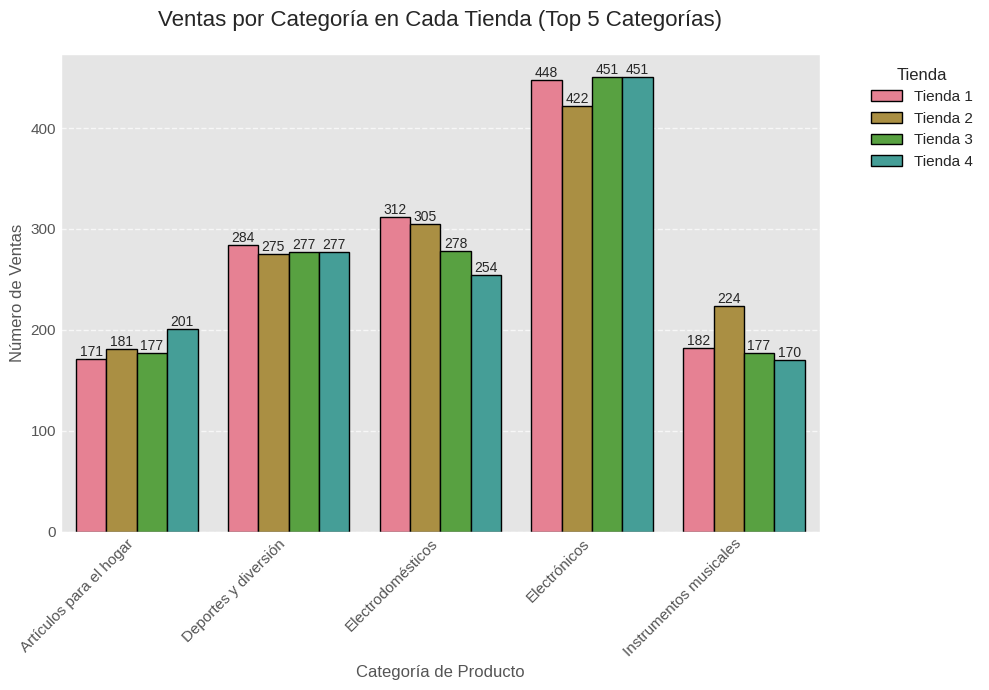

In [120]:
plt.style.use('ggplot')
sns.set_palette("husl")
tiendas = [
    pd.read_csv(v).assign(Tienda=k)
    for k, v in urls.items()
]
ventas = pd.concat(tiendas).groupby(['Tienda', 'Categoría del Producto']) \
                           .size().reset_index(name='Ventas')
top_categorias = ventas['Categoría del Producto'].value_counts().nlargest(5).index     #Filtramos las 5 categorías más vendidas en total
ventas_filt = ventas[ventas['Categoría del Producto'].isin(top_categorias)]
plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x='Categoría del Producto',
    y='Ventas',
    hue='Tienda',
    data=ventas_filt,
    estimator=sum,
    errorbar=None,
    edgecolor='black',
    linewidth=1
)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            f'{int(p.get_height()):,}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 5),
            textcoords='offset points',
            fontsize=10
        )
plt.title('Ventas por Categoría en Cada Tienda (Top 5 Categorías)', fontsize=16, pad=20)
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Número de Ventas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

📌 **- Comentario:**
Observamos que las tres categorías principales se repiten en todas las tiendas, lo que sugiere una estrategia homogénea de surtido. Sin embargo, Tienda 3 destaca en ventas de muebles y electrónicos, lo que la posiciona bien en las categorías de mayor peso. Curiosamente, Tienda 4 lidera en la venta de juguetes (338), lo cual puede indicar un perfil de público distinto o una oportunidad de nicho. A pesar de este dato, su baja facturación sugiere que estas ventas no se traducen en ingresos competitivos, posiblemente debido a precios bajos en esta categoría o a márgenes reducidos.

---



# **2.3.-⭐ Calificación Promedio por Tienda.**

In [121]:
df_cal = pd.DataFrame([
    (nombre, pd.read_csv(url)['Calificación'].mean())
    for nombre, url in urls.items()                                              #Calculamos promedio de calificación por tienda
], columns=['Tienda', 'Calificación Promedio']).sort_values('Calificación Promedio', ascending=False)
html = """<style>.tabla-calificaciones{border-collapse:collapse;width:60%;margin:20px auto;font-family:Arial;box-shadow:0 0 5px rgba(0,0,0,0.1)}
.tabla-calificaciones th{background:#2c3e50;color:white;padding:10px;text-align:center}
.tabla-calificaciones td{padding:8px;border-bottom:1px solid #ddd;text-align:center}
.destacado{color:#FFA500;font-weight:bold}.promedio{font-family:'Courier New'}</style>
<div style='text-align:center;margin-bottom:20px'><h2 style='color:#2c3e50'>Calificación Promedio por Tienda</h2></div>
<table class='tabla-calificaciones'><tr><th>Posición</th><th>Tienda</th><th>Calificación Promedio</th></tr>""" + \
"".join(f"<tr><td>{i}</td><td class='{'destacado' if i==1 else ''}'>{r['Tienda']}</td><td class='promedio {'destacado' if i==1 else ''}'>{r['Calificación Promedio']:.3f}</td></tr>"
        for i, (_, r) in enumerate(df_cal.iterrows(), 1)) + "</table>"

display(HTML(html))
print(f"\nLa tienda con mejor calificación es {df_cal.iloc[0]['Tienda']} con un promedio de {df_cal.iloc[0]['Calificación Promedio']:.2f}")


Posición,Tienda,Calificación Promedio
1,Tienda 3,4.048
2,Tienda 2,4.037
3,Tienda 4,3.996
4,Tienda 1,3.977



La tienda con mejor calificación es Tienda 3 con un promedio de 4.05


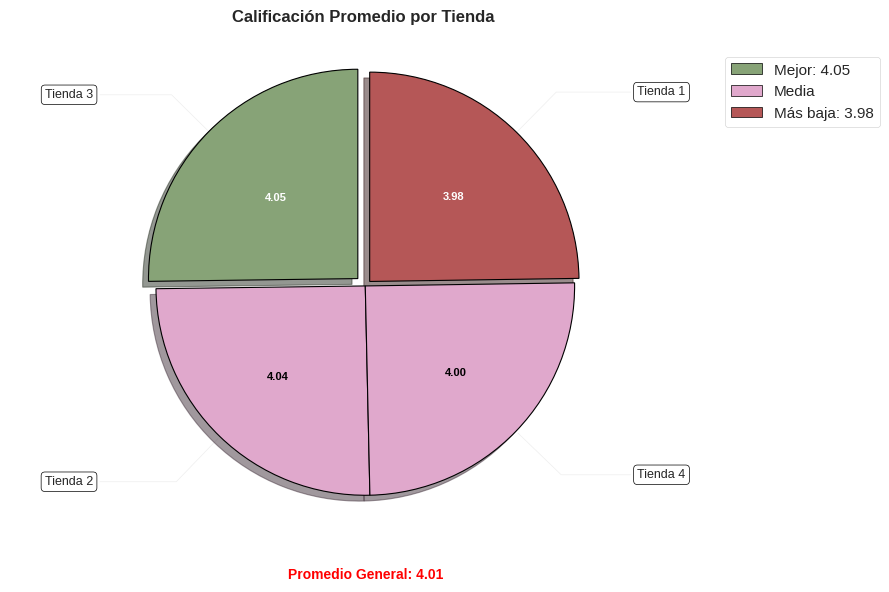

In [122]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'figure.figsize': (9, 6), 'font.size': 10})
df_cal = pd.DataFrame([(k, pd.read_csv(v)['Calificación'].mean()) for k, v in urls.items()],
                      columns=['Tienda', 'Calificación']).sort_values('Calificación', ascending=False)
labels, sizes = df_cal['Tienda'].values, df_cal['Calificación'].values
max_val, min_val = sizes.max(), sizes.min()
verde, vino, rosa = '#87a377', '#b55757', '#e0a8cc'
colors = [verde if x == max_val else vino if x == min_val else rosa for x in sizes]
explode = [0.05 if x == max_val else 0.03 if x == min_val else 0 for x in sizes]
fig, ax = plt.subplots()
wedges, _ = ax.pie(sizes, explode=explode, colors=colors, shadow=True, startangle=90,
                   wedgeprops={'edgecolor': 'black', 'linewidth': 0.8}, pctdistance=0.8)
bbox = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y, x = np.sin(np.deg2rad(ang)), np.cos(np.deg2rad(ang))
    ha = {-1: "right", 1: "left"}[int(np.sign(x))]
    kw["arrowprops"].update({"connectionstyle": f"angle,angleA=0,angleB={ang}"})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.3*y), ha=ha, fontsize=9, **kw)
    ax.text(x*0.6, y*0.6, f"{sizes[i]:.2f}", ha='center', va='center',
            color='white' if colors[i] in [verde, vino] else 'black', fontweight='bold', fontsize=8)
ax.legend(handles=[
    Patch(facecolor=verde, edgecolor='black', label=f'Mejor: {max_val:.2f}'),
    Patch(facecolor=rosa, edgecolor='black', label='Media'),
    Patch(facecolor=vino, edgecolor='black', label=f'Más baja: {min_val:.2f}')
], loc='upper left', bbox_to_anchor=(1, 1), frameon=True)
plt.title('Calificación Promedio por Tienda', pad=20, fontsize=12, fontweight='bold')
ax.text(0, -1.4, f'Promedio General: {df_cal["Calificación"].mean():.2f}', ha='center',
        color='red', fontweight='bold', fontsize=10)
ax.axis('equal')
plt.tight_layout()
plt.show()

📌 **- Comentario:**
La satisfacción del cliente es un indicador crítico para la sostenibilidad del negocio. Tienda 3 tiene la mejor calificación (4.05), lo que sugiere altos estándares de atención, calidad de productos o experiencia de compra. Por otro lado, Tienda 1, aunque es la que más factura, tiene la calificación más baja, lo cual podría revelar problemas en el servicio postventa o en la experiencia general. Tienda 4, en este caso, se ubica por debajo del promedio, lo cual agrava aún más su débil desempeño general. Tener ingresos bajos y, al mismo tiempo, una calificación moderada disminuye su atractivo como activo dentro del portafolio de tiendas.

---



# **2.4.-📊 Productos Más y Menos Vendidos**

In [123]:
df = pd.concat([pd.read_csv(url).assign(Tienda=nombre) for nombre, url in urls.items()])
vp = df.groupby(['Tienda', 'Producto']).agg(
    Ventas=('Producto', 'count'),
    Monto=('Precio', 'sum')
).reset_index()
css = """<style>
.contenedor {display: grid; grid-template-columns: repeat(2, 1fr); gap: 15px; width: 100%}
.tabla {border-collapse: collapse; width: 100%; font-family: Arial; box-shadow: 0 0 5px rgba(0,0,0,0.1)}
.tabla th {background: #2c3e50; color: white; padding: 8px; text-align: center}
.tabla td {padding: 6px; border: 1px solid #ddd; text-align: left}
.destacado {color: #FFA500; font-weight: bold}
.moneda {text-align: right; font-family: 'Courier New'}
.cantidad {text-align: center}
.separador {border-right: 1px solid #ddd}
</style>"""
html = css + "<div class='contenedor'>"
for tienda in sorted(df['Tienda'].unique()):
    top_mas = vp[vp['Tienda'] == tienda].nlargest(5, 'Ventas').to_dict('records')      # Obtenemos los top más vendidos y los top menos vendidos
    top_menos = vp[(vp['Tienda'] == tienda) & (vp['Ventas'] > 1)].nsmallest(5, 'Ventas').to_dict('records')
    filas = "".join(f"""
        <tr>
            <td class='separador {"destacado" if i==0 else ""}'>{mas.get('Producto', '')}</td>
            <td class='cantidad'>{mas.get('Ventas', '')}</td>
            <td class='moneda'>${mas.get('Monto', 0):,.0f}</td>
            <td class='separador {"destacado" if i==0 else ""}'>{menos.get('Producto', '')}</td>
            <td class='cantidad'>{menos.get('Ventas', '')}</td>
            <td class='moneda'>${menos.get('Monto', 0):,.0f}</td>
        </tr>"""
        for i, (mas, menos) in enumerate(list(zip(top_mas + [{}]*5, top_menos + [{}]*5))[:5])
    )
    html += f"""
    <table class='tabla'>
        <tr><th colspan='6'>{tienda}</th></tr>
        <tr><th colspan='3'>Top Más Vendidos</th><th></th><th colspan='3'>Top Menos Vendidos</th></tr>
        <tr>
            <th class='separador'>Producto</th><th class='separador'>Cantidad</th><th class='separador'>Monto</th>
            <th class='separador'>Producto</th><th class='separador'>Cantidad</th><th>Monto</th>
        </tr>
        {filas}
    </table>"""
html += "</div>"
display(HTML(html))

In [124]:
res = pd.concat(
    [pd.read_csv(url).assign(Tienda=nombre) for nombre, url in urls.items()]
).groupby(['Tienda', 'Producto']).agg(
    Ventas=('Producto', 'count'),
    Monto=('Precio', 'sum')
).reset_index()
html = """
<style>
.t {border-collapse:collapse; width:100%; font-family:Arial; margin:20px 0}
.t th {background:#2c3e50; color:white; padding:10px}
.t td {padding:8px; border:1px solid #ddd; text-align:left}
.mv {color:#27ae60; font-weight:bold}
.lv {color:#bf4a3f; font-weight:bold}
</style>
<h3 style='text-align:center'>Productos Destacados por Tienda</h3>
<table class='t'>
<tr><th>Tienda</th><th>Más Vendido (Ventas)</th><th>Monto</th><th>Menos Vendido (Ventas)</th><th>Monto</th></tr>
"""
for tienda in sorted(res['Tienda'].unique()):
    tienda_data = res[res['Tienda'] == tienda]
    mv = tienda_data.nlargest(1, 'Ventas').iloc[0]  # Más vendido
    lv = tienda_data.nsmallest(1, 'Ventas').iloc[0]  # Menos vendido
    html += f"""
<tr>
  <td>{tienda}</td>
  <td class='mv'>{mv['Producto']} ({mv['Ventas']})</td>
  <td>${mv['Monto']:,.0f}</td>
  <td class='lv'>{lv['Producto']} ({lv['Ventas']})</td>
  <td>${lv['Monto']:,.0f}</td>
</tr>"""
display(HTML(html + "</table>"))

Tienda,Más Vendido (Ventas),Monto,Menos Vendido (Ventas),Monto
Tienda 1,Armario (60),"$29,462,300",Auriculares con micrófono (33),"$4,730,800"
Tienda 2,Iniciando en programación (65),"$3,127,800",Juego de mesa (32),"$5,811,900"
Tienda 3,Kit de bancas (57),"$16,699,800",Bloques de construcción (35),"$1,237,200"
Tienda 4,Cama box (62),"$32,946,300",Guitarra eléctrica (33),"$25,823,100"


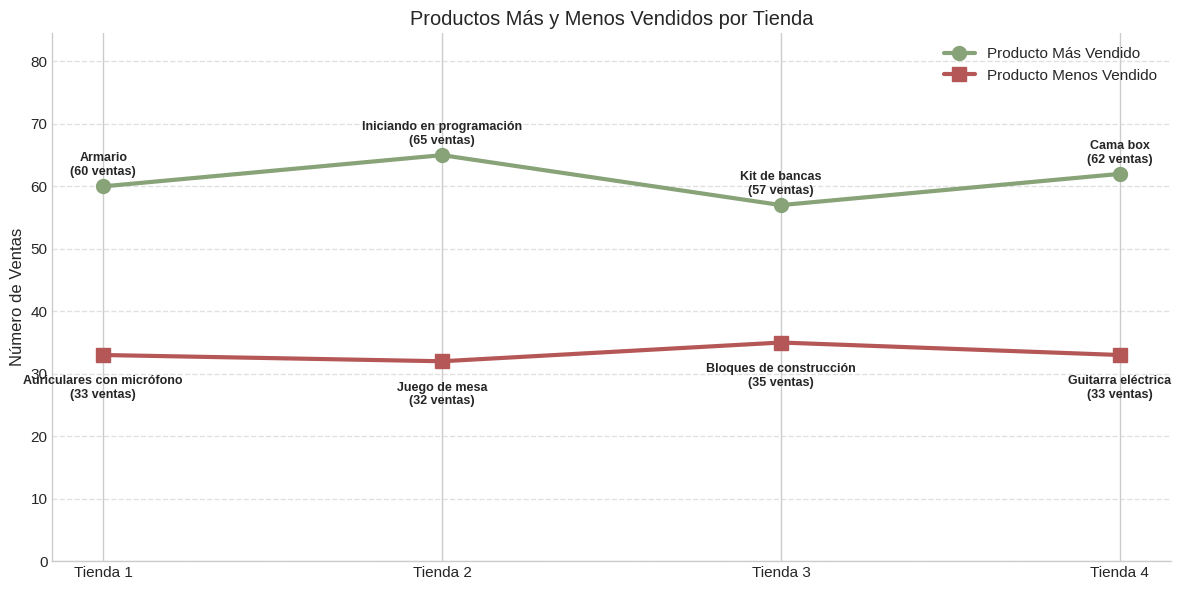

In [125]:
datos_completos = pd.concat([
    pd.read_csv(url).assign(Tienda=nombre) for nombre, url in urls.items()
], ignore_index=True)
if datos_completos.empty:
    raise ValueError("Error al cargar datos - verifica las rutas de las tiendas.")
ventas = datos_completos.groupby(['Tienda', 'Producto']).size().reset_index(name='Unidades')        #Agrupamos por tienda y producto
maximos = ventas.loc[ventas.groupby('Tienda')['Unidades'].idxmax()].assign(Tipo='Más Vendido')      #Obtenemos los productos más y menos vendidos por tienda
minimos = ventas.loc[ventas.groupby('Tienda')['Unidades'].idxmin()].assign(Tipo='Menos Vendido')
resultados = pd.concat([maximos, minimos]).sort_values('Tienda')
fig, ax = plt.subplots(figsize=(12, 6))
colores = {'Más Vendido': '#87a377', 'Menos Vendido': '#b55757'}
x = np.arange(len(resultados['Tienda'].unique()))
max_ventas = resultados['Unidades'].max()

for tipo, marcador in [('Más Vendido', 'o'), ('Menos Vendido', 's')]:
    datos = resultados[resultados['Tipo'] == tipo]
    ax.plot(x, datos['Unidades'], marker=marcador, markersize=10, lw=3,
            color=colores[tipo], label=f'Producto {tipo}')
for i, (_, grupo) in enumerate(resultados.groupby('Tienda')):
    mas, menos = grupo.iloc[0], grupo.iloc[1]
    ax.text(i, mas.Unidades + max_ventas * 0.02, f"{mas.Producto}\n({mas.Unidades} ventas)",
            ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax.text(i, menos.Unidades - max_ventas * 0.05, f"{menos.Producto}\n({menos.Unidades} ventas)",
            ha='center', va='top', fontsize=9, fontweight='bold')
ax.set(
    xticks=x,
    xticklabels=resultados['Tienda'].unique(),
    ylabel='Número de Ventas',
    title='Productos Más y Menos Vendidos por Tienda',
    ylim=(0, max_ventas * 1.3)
)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', ls='--', alpha=0.6)
plt.legend(loc='upper right', framealpha=1)
plt.tight_layout()
plt.show()

📌 **- Comentario:**
Tienda 4 tiene el producto más costoso entre los más vendidos (Cama box), lo cual puede haber elevado el ingreso individual, pero su producto menos vendido (Guitarra eléctrica) también tiene un monto alto, reflejando menor rotación de productos caros.

---



# **2.5.-📊 Costo Promedio de Envío por Tienda.**

In [126]:
df_envio = pd.DataFrame([
    (nombre, pd.read_csv(url)['Costo de envío'].mean())
    for nombre, url in urls.items()
], columns=['Tienda', 'Costo Promedio de Envío']).sort_values('Costo Promedio de Envío', ascending=False)
html = f"""<style>
.tabla-envios{{border-collapse:collapse;width:50%;margin:20px auto;font-family:Arial;box-shadow:0 0 5px rgba(0,0,0,0.1)}}
.tabla-envios th{{background:#2c3e50;color:white;padding:12px;text-align:center}}
.tabla-envios td{{padding:10px;border-bottom:1px solid #ddd;text-align:center}}
.destacado{{color:#bf4a3f;font-weight:bold}}
.moneda{{text-align:right;font-family:'Courier New'}}
.titulo-seccion{{color:#2c3e50;text-align:center;margin:25px 0 15px 0;font-size:20px}}
</style>
<div class='titulo-seccion'><h2>Costo Promedio de Envío por Tienda</h2></div>
<table class='tabla-envios'>
<tr><th>Posición</th><th>Tienda</th><th>Costo Promedio</th></tr>
{''.join(f"<tr><td>{i}</td><td class='{'destacado' if i==1 else ''}'>{r['Tienda']}</td>"
         f"<td class='moneda {'destacado' if i==1 else ''}'>${r['Costo Promedio de Envío']:.2f}</td></tr>"
         for i, (_, r) in enumerate(df_envio.iterrows(), 1))}
</table>
<div style='text-align:center;margin-top:15px;font-style:italic'>
Valores calculados como promedio de todos los envíos por tienda</div>
<div style='text-align:center;margin-top:20px'>
<strong>La tienda con mayor costo promedio de envío es
<span style='color:#bf4a3f'>{df_envio.iloc[0]['Tienda']}</span>
(${df_envio.iloc[0]['Costo Promedio de Envío']:.2f})</strong>
</div>"""
display(HTML(html))


Posición,Tienda,Costo Promedio
1,Tienda 1,$26018.61
2,Tienda 2,$25216.24
3,Tienda 3,$24805.68
4,Tienda 4,$23459.46


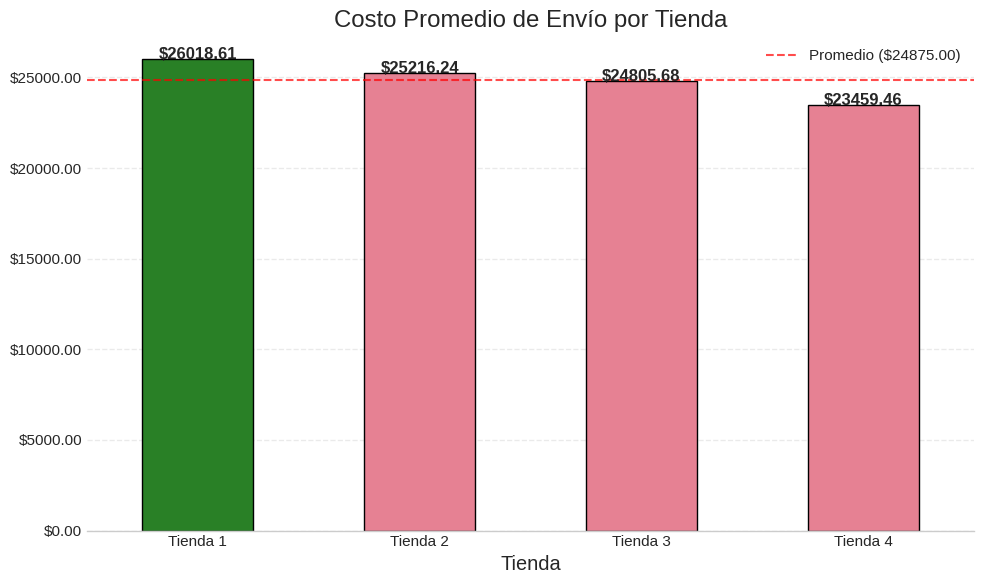

In [127]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 12})
df = pd.DataFrame([(k, pd.read_csv(v)['Costo de envío'].mean()) for k, v in urls.items()],
                  columns=['Tienda', 'Costo Promedio']).sort_values('Costo Promedio', ascending=False)   #Calculamos el costo promedio
fig, ax = plt.subplots()
sns.barplot(x='Tienda', y='Costo Promedio', data=df, order=df['Tienda'], width=0.5,
            edgecolor='black', linewidth=1, ax=ax)
for i, v in enumerate(df['Costo Promedio']):
    ax.text(i, v + 0.05, f'${v:.2f}', ha='center', fontweight='bold')
ax.patches[0].set_facecolor('#298026')
ax.axhline(y := df['Costo Promedio'].mean(), color='red', ls='--', lw=1.5, alpha=0.7,
           label=f'Promedio (${y:.2f})')
ax.set(title='Costo Promedio de Envío por Tienda', ylabel=None)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.2f}'))
plt.legend(loc='upper right')
sns.despine(left=True)
plt.grid(axis='y', ls='--', alpha=0.4)
plt.tight_layout()
plt.show()

📌 **- Comentario:**
El costo logístico es un factor clave para la competitividad. La Tienda 4 tiene el menor costo promedio de envío, lo que en teoría podría ser una fortaleza. No obstante, este ahorro no se refleja en mejores resultados de facturación, satisfacción ni rotación, por lo que no representa una ventaja real. Por el contrario, Tienda 1, aunque enfrenta el mayor costo de envío, sigue liderando en ingresos, lo que sugiere que sus clientes perciben valor suficiente para compensar ese costo. Esto refuerza la idea de que los bajos costos logísticos de Tienda 4 no están siendo explotados de manera efectiva.


---





#**3.- ✅ Conclusión y Recomendación.**

Tras el análisis de los indicadores clave, podemos concluir que la Tienda 4 es la que presenta el desempeño más débil dentro del grupo, por las siguientes razones:


*   Tiene la facturación más baja entre todas las tiendas.

*   Aunque tiene una buena cantidad de ventas en juguetes, su rendimiento general no compensa otras debilidades.

*   Su calificación promedio es inferior a la de las Tiendas 2 y 3, lo cual indica menor satisfacción del cliente.

*   Sus productos menos vendidos tienen valores elevados, lo que puede reflejar dificultades para rotar inventario de alto costo.

*   Aunque cuenta con el costo de envío más bajo, esto no se traduce en una ventaja competitiva suficiente frente a las demás tiendas.

🛑 Por lo tanto, recomendamos al Sr. Juan considerar la venta de la Tienda 4, permitiéndole liberar recursos para explorar nuevos negocios con mayor potencial de éxito.

---



#**4.-​ 👩‍💻​ ¡Extra! Análisis del desempeño geográfico.**

**INDICACIONES:**
- Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

- Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

- Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

In [128]:
!pip install reverse_geocoder folium

In [129]:
import reverse_geocoder as rg
df_geo['Región'] = [r['name'] for r in rg.search(list(zip(df_geo['lat'], df_geo['lon'])))] #Realizamos la búsqueda de latitudes y longitudes para encontrar la región
ventas = df_geo.groupby(['lat', 'lon', 'Región', 'Tienda'])['Precio'].sum().reset_index()
ventas_pivot = ventas.pivot_table(
    index=['lat', 'lon', 'Región'],
    columns='Tienda',
    values='Precio',
    fill_value=0
).reset_index()

ventas_pivot['Total'] = ventas_pivot.iloc[:, 3:].sum(axis=1)
ventas_pivot = ventas_pivot.sort_values(by='Total', ascending=False)       #Ordenamos de mayor a menor según TOTAL
display(ventas_pivot)


Tienda,lat,lon,Región,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Total
8,4.60971,-74.08175,Bogota,440005000.0,479959200.0,475562100.0,419332000.0,1.814858e+09
11,6.25184,-75.56359,Medellin,296858100.0,297246700.0,250580600.0,251983800.0,1.096669e+09
3,3.43722,-76.52250,Cali,154493700.0,118257600.0,109287600.0,124487200.0,5.065261e+08
9,4.81333,-75.69611,Pereira,56214300.0,43073800.0,62504500.0,64134700.0,2.259273e+08
16,10.96854,-74.78132,Barranquilla,32907700.0,27741300.0,36768500.0,34623000.0,1.320405e+08
14,10.39972,-75.51444,Cartagena,22296700.0,21548300.0,34144100.0,24387600.0,1.023767e+08
13,7.89391,-72.50782,Cucuta,37879500.0,28991500.0,25165500.0,7332600.0,9.936910e+07
12,7.12539,-73.11980,Bucaramanga,17579200.0,23895600.0,23538900.0,25559600.0,9.057330e+07
18,11.54444,-72.90722,Riohacha,18512700.0,12656400.0,19025900.0,23684700.0,7.387970e+07
0,-4.21528,-69.94056,Leticia,14669800.0,16159000.0,19212800.0,17108300.0,6.714990e+07


In [130]:
print(ventas_pivot.columns.tolist())

['lat', 'lon', 'Región', 'Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4', 'Total']


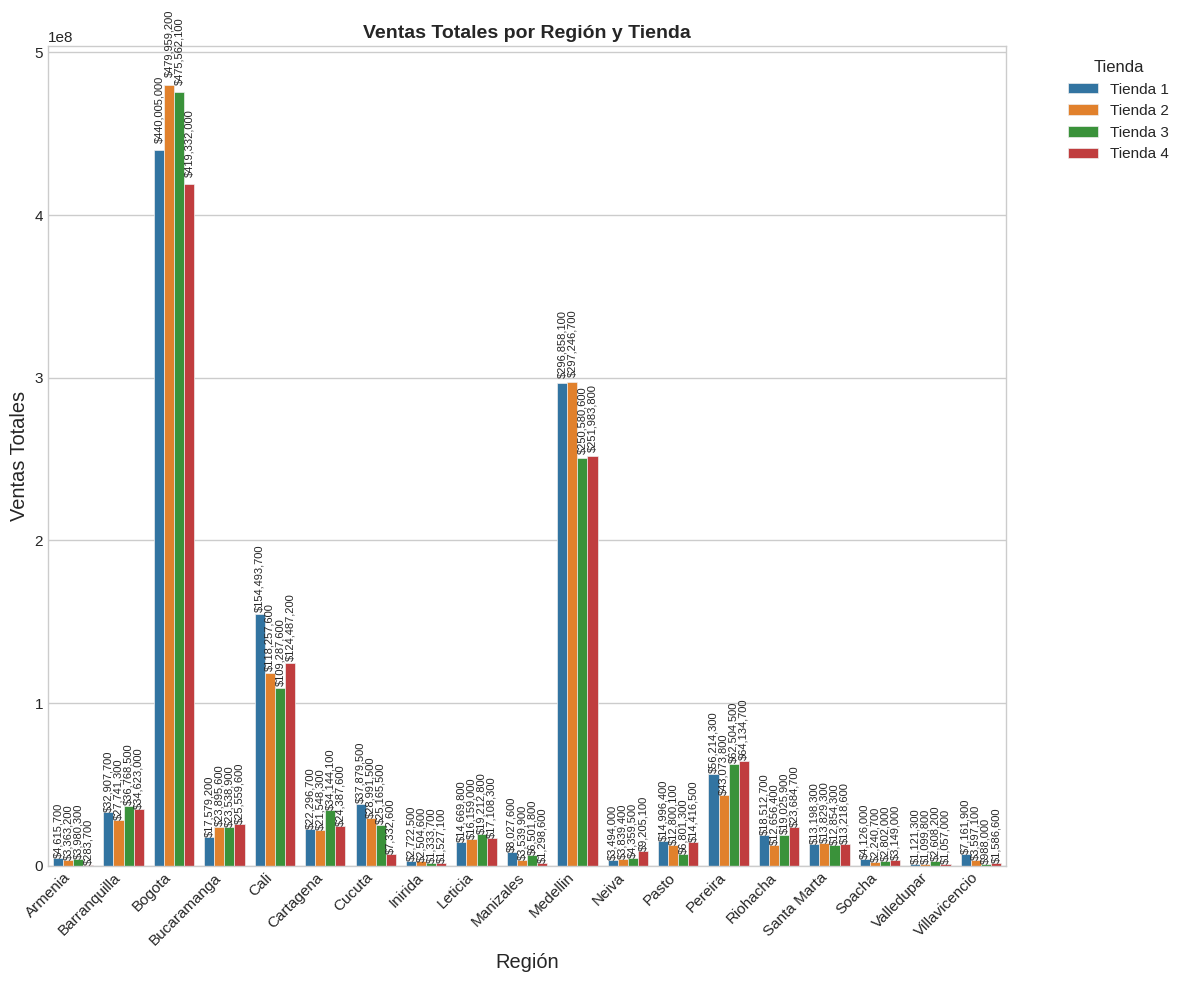

In [131]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    data=ventas_por_region,
    x='Región', y='Ventas Totales',
    hue='Tienda', palette='tab10'
)
plt.title('Ventas Totales por Región y Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Región')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + height * 0.01,
            f"${height:,.0f}",
            ha='center', va='bottom',
            fontsize=8,
            rotation=90
        )
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


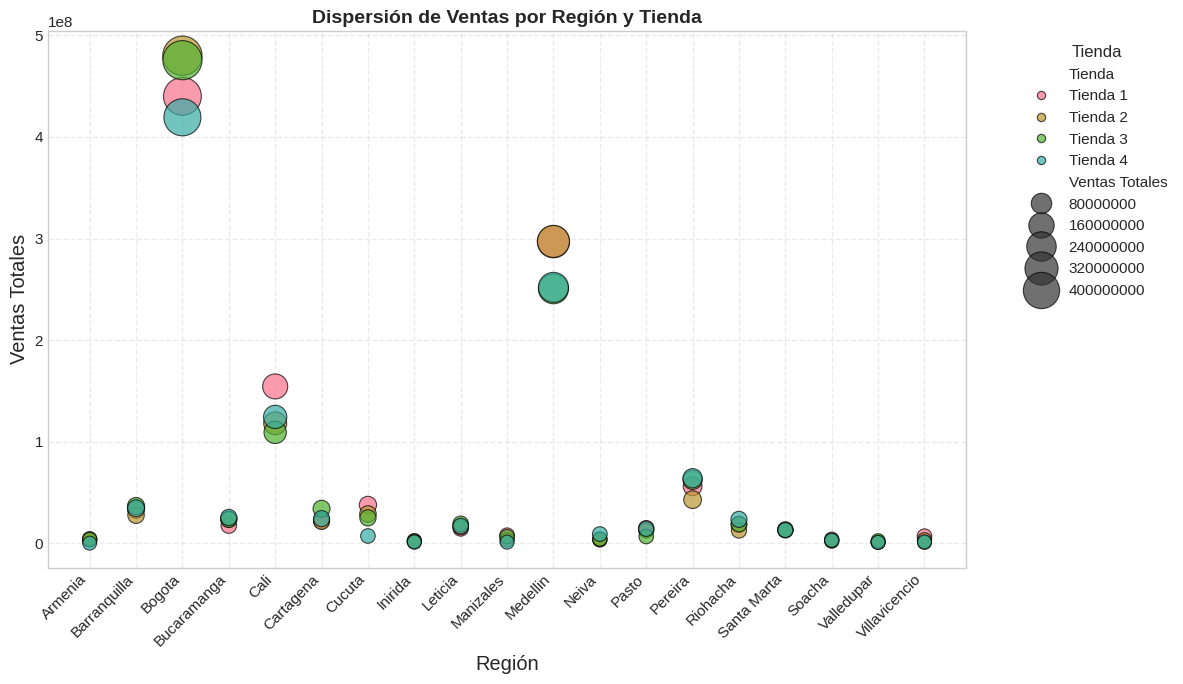

In [132]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=ventas_por_region,
    x='Región',
    y='Ventas Totales',
    hue='Tienda',
    size='Ventas Totales',
    sizes=(100, 800),
    alpha=0.7,
    edgecolor='black'
)
plt.title('Dispersión de Ventas por Región y Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Región')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [134]:
import folium
from folium.plugins import HeatMap
df = pd.concat(tiendas, ignore_index=True)
mapa = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=6) #Mapa de calor
datos_mapa = df[['lat', 'lon']].values.tolist()
HeatMap(datos_mapa).add_to(mapa)
mapa



---

